# Applied Linear Regression

The dataset below records the average weight of the brain and body for a number of mammal species.  

There are 62 rows of data.  The 3 data columns include:

      I,  the index,
      A1, the brain weight;
      B,  the body weight.

    We seek a model of the form: B = A1 * X1.

http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt

In [1]:
import pandas as pd
import requests
%pylab inline
pylab.style.use('ggplot')

URL = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt'

result = requests.get(URL)
data = [line.strip() for line in result.text.split('\n') if not line.startswith('#')]

Populating the interactive namespace from numpy and matplotlib


In [2]:
data

['3 columns',
 '62 rows',
 'Index',
 'Brain Weight',
 'Body Weight',
 '1     3.385    44.500',
 '2     0.480    15.500',
 '3     1.350     8.100',
 '4   465.000   423.000',
 '5    36.330   119.500',
 '6    27.660   115.000',
 '7    14.830    98.200',
 '8     1.040     5.500',
 '9     4.190    58.000',
 '10     0.425     6.400',
 '11     0.101     4.000',
 '12     0.920     5.700',
 '13     1.000     6.600',
 '14     0.005     0.140',
 '15     0.060     1.000',
 '16     3.500    10.800',
 '17     2.000    12.300',
 '18     1.700     6.300',
 '19  2547.000  4603.000',
 '20     0.023     0.300',
 '21   187.100   419.000',
 '22   521.000   655.000',
 '23     0.785     3.500',
 '24    10.000   115.000',
 '25     3.300    25.600',
 '26     0.200     5.000',
 '27     1.410    17.500',
 '28   529.000   680.000',
 '29   207.000   406.000',
 '30    85.000   325.000',
 '31     0.750    12.300',
 '32    62.000  1320.000',
 '33  6654.000  5712.000',
 '34     3.500     3.900',
 '35     6.800   179.0

In [3]:
ncols = int(data[0].split(' ')[0])
nrows = int(data[1].split(' ')[0])

col_slice = slice(2, ncols + 2)
columns = data[col_slice]

In [4]:
columns

['Index', 'Brain Weight', 'Body Weight']

In [5]:
row_slice = slice(ncols + 2, ncols + nrows+2)
rows = data[row_slice]

In [6]:
rows

['1     3.385    44.500',
 '2     0.480    15.500',
 '3     1.350     8.100',
 '4   465.000   423.000',
 '5    36.330   119.500',
 '6    27.660   115.000',
 '7    14.830    98.200',
 '8     1.040     5.500',
 '9     4.190    58.000',
 '10     0.425     6.400',
 '11     0.101     4.000',
 '12     0.920     5.700',
 '13     1.000     6.600',
 '14     0.005     0.140',
 '15     0.060     1.000',
 '16     3.500    10.800',
 '17     2.000    12.300',
 '18     1.700     6.300',
 '19  2547.000  4603.000',
 '20     0.023     0.300',
 '21   187.100   419.000',
 '22   521.000   655.000',
 '23     0.785     3.500',
 '24    10.000   115.000',
 '25     3.300    25.600',
 '26     0.200     5.000',
 '27     1.410    17.500',
 '28   529.000   680.000',
 '29   207.000   406.000',
 '30    85.000   325.000',
 '31     0.750    12.300',
 '32    62.000  1320.000',
 '33  6654.000  5712.000',
 '34     3.500     3.900',
 '35     6.800   179.000',
 '36    35.000    56.000',
 '37     4.050    17.000',
 '38     0

In [7]:
from io import StringIO
import re
csv_data = re.sub(r'[ ]+', ',', '\n'.join(rows))
data_df = pd.read_csv(StringIO(csv_data), header=None, names=columns)
data_df.head(5)

,Index,Brain Weight,Body Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


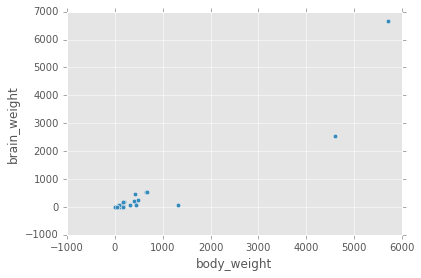

In [9]:
data_df = data_df.rename(columns={'Body Weight': 'body_weight', 'Brain Weight': 'brain_weight'})
data_df.plot(kind='scatter', x='body_weight', y='brain_weight')

In [11]:
import statsmodels.formula.api as smf
results = smf.ols('brain_weight ~ body_weight', data=data_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           brain_weight   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Mon, 27 Mar 2017   Prob (F-statistic):           1.54e-28
Time:                        23:29:16   Log-Likelihood:                -445.27
No. Observations:                  62   AIC:                             894.5
Df Residuals:                      60   BIC:                             898.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -56.8555     42.978     -1.323      0.191      -142.824    29.113
body_weight     0.9029      0.045     20.278      0.000         0.814     0.992
==============================================================================
Omnibus:                       35.627   Durbin-Watson:                   2.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.333
Skew:                          -0.627   Prob(JB):                    4.83e-171
Kurtosis:                      20.379   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
results.params

Intercept     -56.855545
body_weight     0.902913
dtype: float64

In [17]:
fitted_model = data_df['body_weight'] * results.params['body_weight'] + results.params['Intercept']
predicted_df = pd.concat(
    {'predicted_brain_weight': fitted_model, 
     'actual_brain_weight': data_df['brain_weight'],
     'body_weight': data_df['body_weight'],
    }, axis=1)

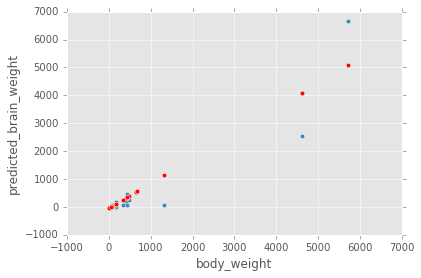

In [22]:
ax = predicted_df.plot(kind='scatter', x='body_weight', y='actual_brain_weight')
predicted_df.plot(ax=ax, kind='scatter', x='body_weight', y='predicted_brain_weight', color='red')